In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#read data
ts_data = pd.read_csv('./data/1-retail_daily_amount.csv', index_col='Date', parse_dates=True)
log_data = pd.read_csv('./data/2-retail_daily_amount_log.csv', index_col='Date', parse_dates=True)
log_data_r_mean = pd.read_csv('./data/2-retail_daily_amount_log_r_mean.csv', index_col='Date', parse_dates=True)
log_returns = pd.read_csv('./data/2-retail_daily_amount_log_returns.csv', index_col='Date', parse_dates=True)
df_diff = pd.read_csv('./data/2-retail_daily_amount_diff.csv', index_col='Date', parse_dates=True)

# ARMA / ARIMA / SARIMA Models


- The ARIMA model takes in three parameters:
    - 1. p is the order of the AR term
    - 2. q is the order of the MA term
    - 3. d is the number of differencing
    
    Seasonal ARIMA model. Here, the order argument specifies the
(p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal
component of the Seasonal ARIMA model.

In [77]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import itertools
import pmdarima as pm
warnings.filterwarnings("ignore")   ##### ignore warnings 
plt.figure(figsize=(20,10)) 

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Autoregressive model

Next we are going to use AR(1,0,0) model, 1 for the autoregressive side, 0 for differentiation because this series has already no trend and no seasonality and 0 for number of lags for the moving average. It is a regressive prosses of order one.

In [6]:
# Now we want to check our data with this simple ARIMA(1,0,0) model
mod1 = ARIMA(df_diff, order=(1,0,0))
result1=mod1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  589
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -605.478
Date:                Fri, 18 Jun 2021   AIC                           1216.957
Time:                        21:01:24   BIC                           1230.092
Sample:                             0   HQIC                          1222.074
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.019      0.120      0.904      -0.035       0.040
ar.L1         -0.4505      0.034    -13.274      0.000      -0.517      -0.384
sigma2         0.4573      0.021     21.415      0.000       0.415       0.499
===================================================================================
Ljung-Box (Q):                      229.84   Jarque-Bera (JB):                32.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.09
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

P.Valeu is bigger than 0.05 in the constant, we don’t reject the null hypothesis, H0 test the coefficient equal 0, then we can say the constant is null. In the autoregressive L1, P.Valeu is smaller than 0.05, we can say we reject the null hypothesis, the estimated coefficient is 0. W can conclude the autoregressive term of order 1 is statistically significant.

## ARIMA Model

Next, we are going to do a ARIMA (0,0,1) model, using moving average of 1 lag for the residual term. Zero for the autoregressive side, 0 for the integration side and 1 lag for moving average.

In [7]:
# Now we want to check our data with this simple ARIMA(0,0,1) model
mod2 = ARIMA(df_diff, order=(0,0,1))
result2=mod2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  589
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -549.045
Date:                Fri, 18 Jun 2021   AIC                           1104.090
Time:                        21:01:38   BIC                           1117.226
Sample:                             0   HQIC                          1109.208
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.006      0.198      0.843      -0.010       0.012
ma.L1         -0.7770      0.021    -36.900      0.000      -0.818      -0.736
sigma2         0.3771      0.017     21.714      0.000       0.343       0.411
===================================================================================
Ljung-Box (Q):                      173.46   Jarque-Bera (JB):                42.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.16
Prob(H) (two-sided):                  0.85   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Again the constant is null, but we don't regect the term moving average because P.valeu is 0.

## ARMA Model

Next, we are going to do ARMA model (1,0,1), autoregressive model with moving average with 1 lag.

In [8]:
# Now we want to check our data with this simple ARIMA(1,0,1) model
mod3 = ARIMA(df_diff, order=(1,0,1))
result3=mod3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  589
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -535.304
Date:                Fri, 18 Jun 2021   AIC                           1078.608
Time:                        21:01:45   BIC                           1096.121
Sample:                             0   HQIC                          1085.431
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.853      0.394      -0.000       0.001
ar.L1          0.2389      0.032      7.541      0.000       0.177       0.301
ma.L1         -0.9999      0.627     -1.595      0.111      -2.228       0.229
sigma2         0.3569      0.224      1.597      0.110      -0.081       0.795
===================================================================================
Ljung-Box (Q):                      175.65   Jarque-Bera (JB):                28.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.06
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the comparison of information criteria, the Third model has lower AIC and HQIC, using this criteria the second model could be better.

- The final part of modelling a time series is to study the residuals.
- Ideally, the residuals will be white noise, with no autocorrelation.
- A good way to test this is to use the Ljung-Box test. Note that this test can only be applied to the residuals.
- Here, the null hypothesis for the Ljung-Box test is that there is no autocorrelation.
- White noise, by definition, is random data. A time series is white noise(random) if the variables are independent and identically distributed(i.i.d) with a mean of zero. In other words, the time series has a mean μ = 0 and a constant standard deviation σ = c.

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Ljung-Box test
acorr_ljungbox(result3.resid, lags=[2], return_df=True)

,lb_stat,lb_pvalue
2,4.22309,0.121051


We don’t reject the null, the residuals are independent.

In [10]:
# forecast one out-of-sample value
ff = result3.forecast(steps=1, alpha=0.05)
ff

589   -1.447977
dtype: float64

In [11]:
df_diff1=df_diff.copy()

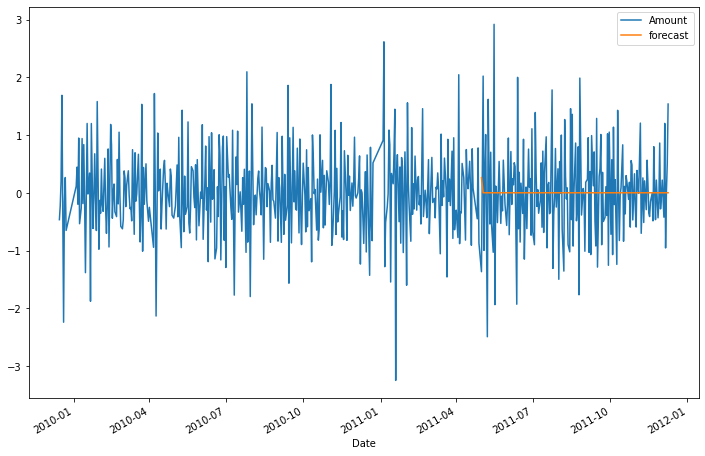

In [78]:
df_diff1['forecast']=result2.predict(start=400,end=588,dynamic=True)
df_diff1[['Amount','forecast']].plot(figsize=(12,8))

Now, the ideal would be to invert the logarithm and differentiation we did, but the model does not look exceptional, so we are going perform a Auto Arima and Sarimax model. 

# Autosarma model with original data

In [13]:
#ts_data= original data
#log_data= logarithmic data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use original data. 

In [14]:
data=ts_data.copy()

In [15]:
# packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss    ##### unit root test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm    ##### auto-arima
import warnings
warnings.filterwarnings("ignore")   ##### ignore warnings  

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 602 entries, 2009-12-01 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  602 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


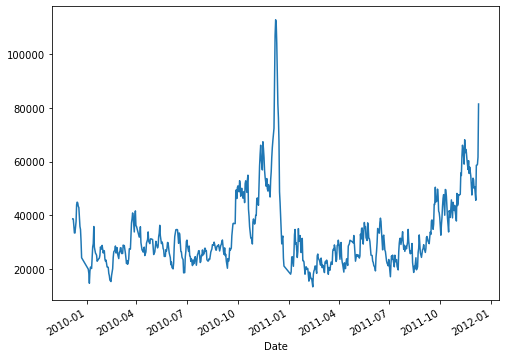

In [79]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [18]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [19]:
# number of observations in the test set with 'shape'
test_data.shape

(185,)

In [20]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 0.000888585841622309
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because according with D-fuller test the training series was stationary, and in fact in test the model had better results when we use differentiation 0 compared with 1. For se seasonal side we use D equal 1. 

In [21]:
# fit stepwise autoARMA with seasonality (sarma)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=9325.566, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9527.776, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9387.440, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9361.393, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9526.008, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=9467.131, Time=0.22 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=9323.998, Time=2.39 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=9377.717, Time=0.56 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=9329.014, Time=3.03 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=9327.258, Time=2.04 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=9357.876, Time=1.86 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=9330.010, Time=4.57 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=9362.158, Time=0.65 sec
 ARIMA(1,0,0)(1,1,1)[12]

According with this package pm Arima, the best model is an Sarima. For trend side with 2 lags for the autoregressive, without differentiation and two lags in the error term for moving average. For the seasonal side we have 0 lags for autoregressive and one lag for the moving average.  

In [23]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  417
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -4653.660
Date:                              Fri, 18 Jun 2021   AIC                           9319.319
Time:                                      21:08:56   BIC                           9343.342
Sample:                                           0   HQIC                          9328.828
                                              - 417                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0061      0.125      0.049      0.961      -0.240       0.252
ar.L2          0.8043      0.106      7.594      0.000       0.597       1.012
ma.L1          0.2610      0.136      1.915      0.056      -0.006       0.528
ma.L2         -0.6613      0.094     -7.064      0.000      -0.845      -0.478
ma.S.L12      -0.8279      0.052    -15.923      0.000      -0.930      -0.726
sigma2      8.074e+08   1.33e-10   6.07e+18      0.000    8.07e+08    8.07e+08
===================================================================================
Ljung-Box (Q):                       52.00   Jarque-Bera (JB):             15662.10
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               5.03   Skew:                             3.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+34. Standard errors may be unstable.
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
Autoregressive with lag 1 and moving average with lag 1 has p.valeu bigger than 0.05, this variable are not statistically significant, don't bring contribution to the target. The situation is not the ideal, because not all variables are statistically significant, for two variables we don´t reject the hypothesis that the coefficient is null.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

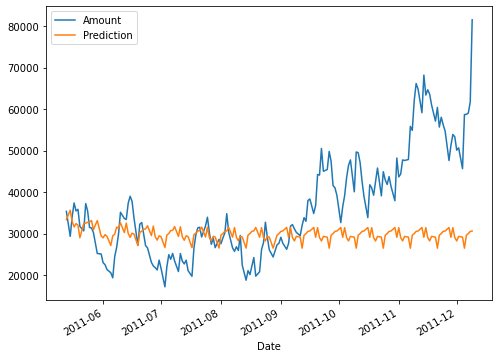

In [89]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 185 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6)).get_figure()
plt.show()

We can see that the model had reasonable  performance until Christmas time time, but was not able to predict the Christmas time sales period in a efficient way. 

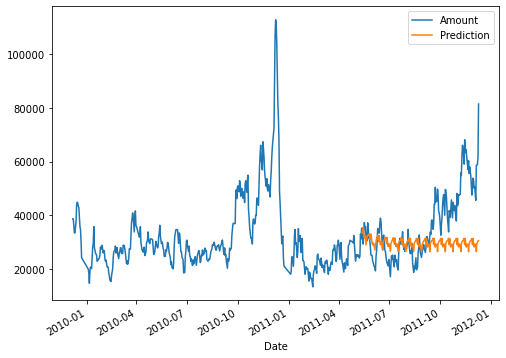

In [90]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

In [26]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=185, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 1210538148.3584573
SMAPE: 47.77302624893639


In [27]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 51.00%


We can see that the mean absolute percentage error for the forecast is high. We did try different configurations of parameters in the model and different ways to split the train and test data, but the performance was not god in any of them. So, we are going to try different models, we are going to use the log returns data for the next model. 

# Autosarima model with log returns data (first difference)

In [28]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use log returns data with the first difference.

In [29]:
data=log_returns.copy()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2009-12-02 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  601 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


<Figure size 432x288 with 0 Axes>

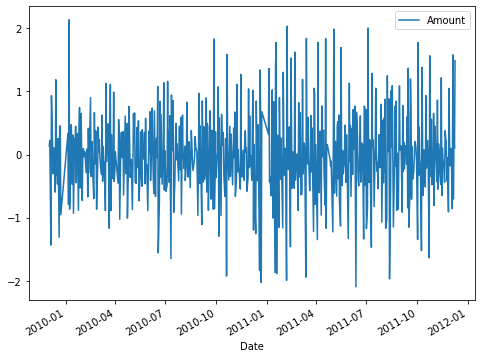

In [31]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [32]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [33]:
# number of observations in the test set with 'shape'
test_data.shape

(184,)

In [34]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 2.7952010049308344e-12
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARIMA model. We are going to start with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because according with D-fuller test the training series was stationary, and in fact in test the model had better results when we use differentiation 0 compared with 1. For se seasonal side we use D equal 1. 

In [35]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=616.138, Time=2.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=907.580, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=769.227, Time=0.63 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=621.846, Time=1.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=905.583, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=616.195, Time=2.66 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=616.442, Time=11.00 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=674.237, Time=2.68 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=617.845, Time=9.78 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=715.722, Time=1.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=617.971, Time=4.21 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=616.577, Time=3.58 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=783.621, Time=0.50 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept  

According with this package pm Arima, the best model is an Sarima. For trend side with 0 lags for the autoregressive, without differentiation and two lags in the error term for moving average. For the seasonal side we have 0 lags for autoregressive and one lag for the moving average.  

In [36]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  417
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -302.954
Date:                              Fri, 18 Jun 2021   AIC                            613.908
Time:                                      21:16:20   BIC                            629.924
Sample:                                           0   HQIC                           620.248
                                              - 417                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7172      0.049    -14.688      0.000      -0.813      -0.621
ma.L2         -0.1521      0.048     -3.200      0.001      -0.245      -0.059
ma.S.L12      -0.7756      0.035    -22.257      0.000      -0.844      -0.707
sigma2         0.2533      0.013     19.467      0.000       0.228       0.279
===================================================================================
Ljung-Box (Q):                       56.02   Jarque-Bera (JB):                59.56
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
All variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

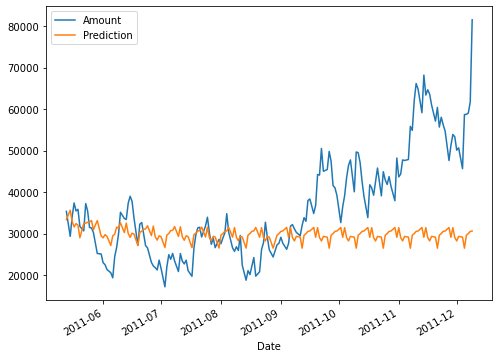

In [91]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6))
plt.show()

Removing the trend, we can see that our model has etter performance. 

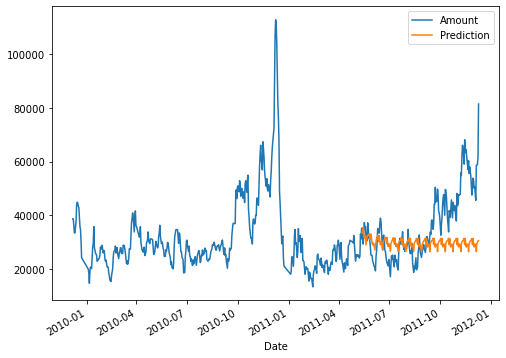

In [92]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

In [39]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=184, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 0.7540873553297172
SMAPE: 146.84121944251783


In [40]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 232.20%


Visual our model looks better but,  we can see that the mean absolute percentage error for the forecast is Worst than the previous model . So, we are going to try different models, we are going to use the differentiation of order 12 data for the next model. 

# Autosarima model with log returns and differentiation of order 12

In [41]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use the data data with log returns and differentiation of order 12.

In [42]:
data=df_diff.copy()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2009-12-15 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  589 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


<Figure size 432x288 with 0 Axes>

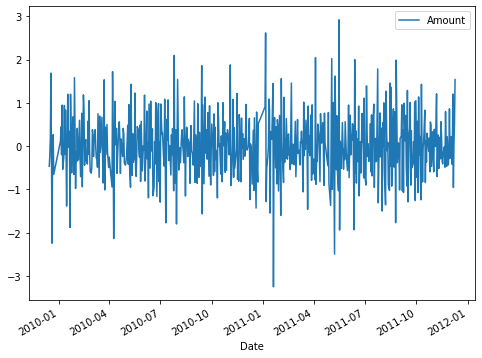

In [44]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [45]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [46]:
# number of observations in the test set with 'shape'
test_data.shape

(172,)

In [47]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 2.071325461541487e-18
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARIMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because Because the data has already a differentiation of order 12.

In [95]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1341.682, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1074.965, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1339.684, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1268.213, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=985.932, Time=2.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.45 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1069.045, Time=2.09 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=939.200, Time=2.52 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1032.857, Time=0.88 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.86 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.51 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=936.92

According with this package pm Arima, the best model is an Sarima. For trend side with 5 lags for the autoregressive, without differentiation and 0 lags in the error term for moving average. For the seasonal side we have 2 lags for autoregressive and 1 lag for the moving average.  

In [49]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  417
Model:             SARIMAX(6, 0, 1)x(2, 1, [], 12)   Log Likelihood                -428.897
Date:                             Fri, 18 Jun 2021   AIC                            879.795
Time:                                     21:21:38   BIC                            923.837
Sample:                                          0   HQIC                           897.228
                                             - 417                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.001      0.155      0.877      -0.001       0.001
ar.L1          0.2367      0.052      4.551      0.000       0.135       0.339
ar.L2          0.0569      0.062      0.918      0.358      -0.065       0.178
ar.L3          0.1141      0.054      2.100      0.036       0.008       0.221
ar.L4         -0.0935      0.056     -1.665      0.096      -0.204       0.017
ar.L5          0.1237      0.055      2.270      0.023       0.017       0.231
ar.L6          0.0555      0.053      1.044      0.297      -0.049       0.160
ma.L1         -0.9864      0.022    -44.417      0.000      -1.030      -0.943
ar.S.L12      -0.9590      0.040    -23.751      0.000      -1.038      -0.880
ar.S.L24      -0.4549      0.041    -11.042      0.000      -0.536      -0.374
sigma2         0.4687      0.031     14.879      0.000       0.407       0.530
===================================================================================
Ljung-Box (Q):                       81.51   Jarque-Bera (JB):                12.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
All variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

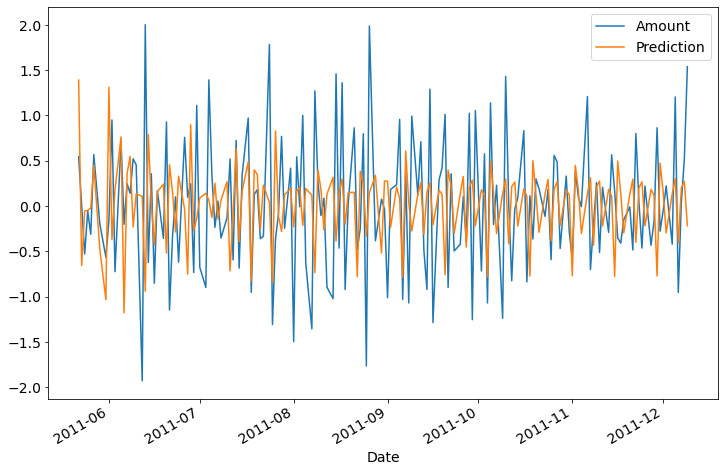

In [97]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot()
plt.show()

Removing the trend, we can see that our model has simmilar performace with the last one. Let’s check the performance measures. 

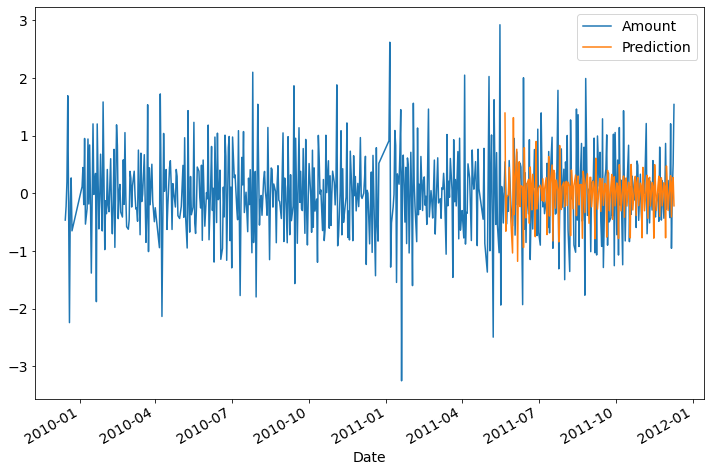

In [98]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot()

In [99]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=172, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 0.6904685490572067
SMAPE: 144.5494963960515


In [100]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 232.49%


We can see that the mean absolute percentage error for the forecast is almost the same compared with le last one.

# Autosarima model with Smoothing and moving average data 

In [101]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use the data data with Smoothing and moving average dat. 

In [50]:
data=np.exp(log_data_r_mean)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2009-12-07 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  596 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


<Figure size 432x288 with 0 Axes>

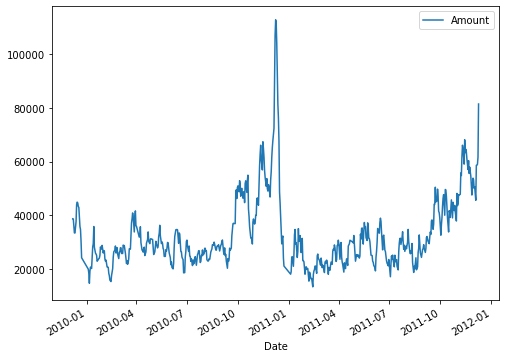

In [52]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [53]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [54]:
# number of observations in the test set with 'shape'
test_data.shape

(179,)

In [55]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 0.22917266740998082
We do not reject the H0: non-stationary time series <-> we have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARIMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 12 and for moving average is 12. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 1.

In [56]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=12, max_q=12, m=12,
start_P=0, seasonal=True,d=1, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=7759.166, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8008.999, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7825.257, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7765.177, Time=1.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7921.898, Time=0.21 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=7761.056, Time=2.26 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=7761.075, Time=5.03 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=7825.844, Time=0.58 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=8.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=7760.241, Time=0.98 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=7789.939, Time=1.02 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=7760.847, Time=1.84 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=7797.166, Time=0.55 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=7765.356, Time=1.36 sec
 ARIMA(2,1,0)(0,1,1)[12]

According with this package pm Arima, the best model is an Sarima. For trend side with 1 lags for the autoregressive, differentiation 1 and 1 lags in the error term for moving average. For the seasonal side we have 0 lags for autoregressive and 1 lag for the moving average.  

In [57]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  417
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3875.583
Date:                            Fri, 18 Jun 2021   AIC                           7759.166
Time:                                    21:24:44   BIC                           7775.172
Sample:                                         0   HQIC                          7765.502
                                            - 417                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5694      0.081      6.991      0.000       0.410       0.729
ma.L1         -0.2995      0.107     -2.811      0.005      -0.508      -0.091
ma.S.L12      -0.7334      0.031    -23.498      0.000      -0.795      -0.672
sigma2      1.239e+07   5.84e+05     21.203      0.000    1.12e+07    1.35e+07
===================================================================================
Ljung-Box (Q):                      120.15   Jarque-Bera (JB):               217.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
All variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

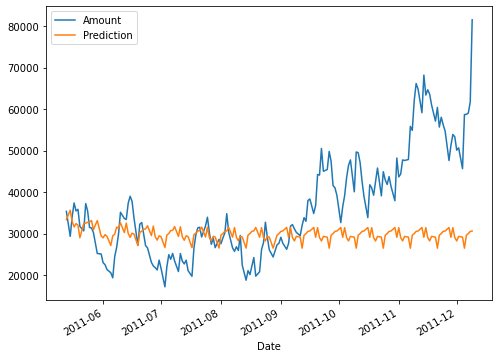

In [93]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6))
plt.show()

Removing the trend, we can see that our model has simmilar performace with the last one. Let’s check the performance measures. 

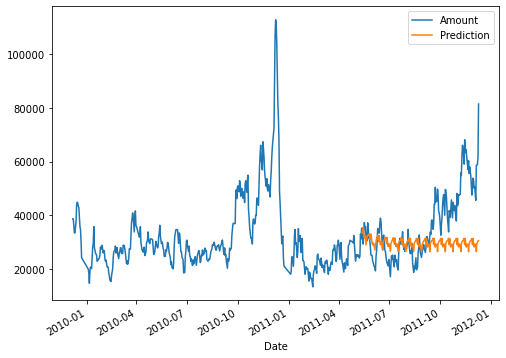

In [94]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

This model was able to predict the increase of Christmas sales, but did it in a linear away, was not able to predict all the patron of the data. 

In [60]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=179, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 448885984.7312194
SMAPE: 44.683913522560005


In [61]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 62.90%


We can see that the mean absolute percentage error for the forecast is smaler, But is still hight, lets try to make another model with different configurations, we are going to use differentiation 0 in the AutoSarma  parameter.

# Autosarma model with Smoothing and moving average data: d=0

In [62]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use the data data with Smoothing and moving average data.

In [63]:
data=np.exp(log_data_r_mean)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2009-12-07 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  596 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


<Figure size 432x288 with 0 Axes>

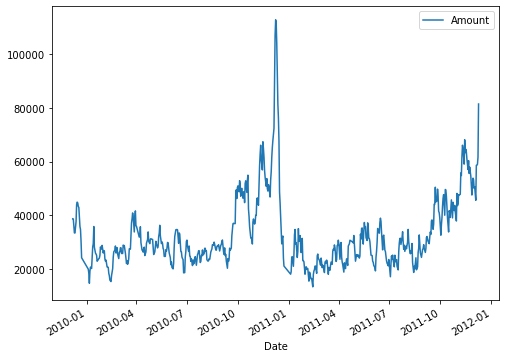

In [65]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [66]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [67]:
# number of observations in the test set with 'shape'
test_data.shape

(179,)

In [68]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 0.22917266740998082
We do not reject the H0: non-stationary time series <-> we have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 12 and for moving average is 12. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0.

In [69]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=12, max_q=12, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=7835.980, Time=1.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8948.478, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7917.027, Time=1.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8396.423, Time=2.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8946.864, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=8001.796, Time=0.24 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=7833.918, Time=2.54 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=7871.581, Time=1.66 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=7832.832, Time=8.51 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=7874.818, Time=2.79 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=7860.424, Time=7.65 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=7833.101, Time=9.40 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=7.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=7859.231, Time=7.46 sec
 ARIMA(2,0,1)(2,1,1)[12]

According with this package pm Arima, the best model is an Sarima. For trend side with 0 lags for the autoregressive, differentiation 0 and 0 lags in the error term for moving average. For the seasonal side we have 2 lags for autoregressive and 1 lag for the moving average.  

In [70]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  417
Model:             SARIMAX(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood               -3906.813
Date:                              Fri, 18 Jun 2021   AIC                           7825.626
Time:                                      21:30:34   BIC                           7849.650
Sample:                                           0   HQIC                          7835.135
                                              - 417                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2256      0.038     32.579      0.000       1.152       1.299
ar.L2         -0.2974      0.040     -7.464      0.000      -0.375      -0.219
ar.S.L12       0.0018      0.070      0.026      0.979      -0.136       0.140
ar.S.L24       0.1665      0.060      2.766      0.006       0.049       0.284
ma.S.L12      -0.7970      0.060    -13.297      0.000      -0.915      -0.680
sigma2      1.361e+07   2.26e-09   6.02e+15      0.000    1.36e+07    1.36e+07
===================================================================================
Ljung-Box (Q):                       89.77   Jarque-Bera (JB):               638.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.69
Prob(H) (two-sided):                  0.07   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+31. Standard errors may be unstable.
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
Not all variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

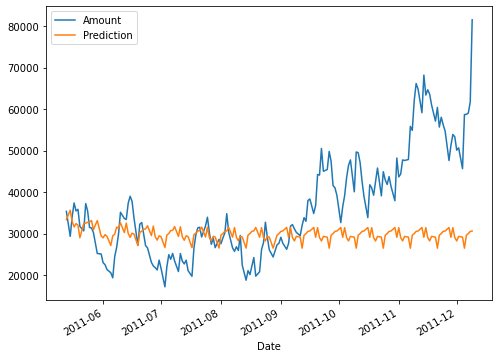

In [95]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6))
plt.show()

Removing the trend, we can see that our model has simmilar performace with the last one. Let’s check the performance measures. 

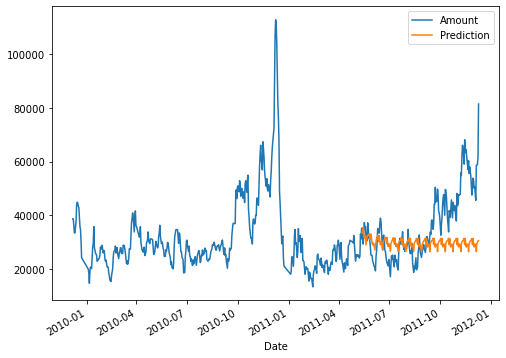

In [96]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

In [73]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=179, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 209698171.5022377
SMAPE: 28.517334419372393


In [74]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 25.40%
